# add_layer 功能

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def add_layer(inputs,in_size,out_size,activation_function=None):
    
    # 接下来，我们开始定义weights和biases。
    # 因为在生成初始参数时，随机变量(normal distribution)会比全部为0要好很多，
    # 所以我们这里的weights为一个in_size行, out_size列的随机变量矩阵。
    Weights = tf.Variable(tf.random_normal([in_size,out_size]))
    
    # 在机器学习中，biases的推荐值不为0，所以我们这里是在0向量的基础上又加了0.1。
    biases = tf.Variable(tf.zeros([1,out_size]) + 0.1)
    
    # 下面，我们定义Wx_plus_b, 即神经网络未激活的值。其中，tf.matmul()是矩阵的乘法。
    Wx_plus_b = tf.matmul(inputs,Weights) + biases
    
    # 当activation_function——激励函数为None时，输出就是当前的预测值——Wx_plus_b，
    # 不为None时，就把Wx_plus_b传到activation_function()函数中得到输出。
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    # 最后，返回输出，添加一个神经层的函数——def add_layer()就定义好了。
    return outputs


# 导入数据

构建所需的数据。 这里的x_data和y_data并不是严格的一元二次函数的关系，因为我们多加了一个noise,这样看起来会更像真实情况。

In [2]:
x_data = np.linspace(-1,1,300)[:,np.newaxis]
noise = np.random.normal(0,0.05,x_data.shape)
y_data = np.square(x_data) - 0.5 + noise

利用占位符定义我们所需的神经网络的输入。 tf.placeholder()就是代表占位符，这里的None代表无论输入有多少都可以，因为输入只有一个特征，所以这里是1。

In [3]:
xs = tf.placeholder(tf.float32,[None,1])
ys = tf.placeholder(tf.float32,[None,1])

# 搭建网络

接下来，我们就可以开始定义神经层了。 通常神经层都包括输入层、隐藏层和输出层。这里的输入层只有一个属性， 所以我们就只有一个输入；隐藏层我们可以自己假设，这里我们假设隐藏层有10个神经元； 输出层和输入层的结构是一样的，所以我们的输出层也是只有一层。 所以，我们构建的是——输入层1个、隐藏层10个、输出层1个的神经网络。

下面，我们开始定义隐藏层,利用之前的add_layer()函数，这里使用 Tensorflow 自带的激励函数tf.nn.relu。

In [4]:
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)


接着，定义输出层。此时的输入就是隐藏层的输出——l1，输入有10层（隐藏层的输出层），输出有1层。

In [5]:
prediction = add_layer(l1,10,1,activation_function=None)

计算预测值prediction和真实值的误差，对二者差的平方求和再取平均。

In [6]:
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys-prediction),
                                   reduction_indices=[1])) 
# reduction_indices=[1]:按行求和
# reduction_indices=[0]:按列求和

接下来，是很关键的一步，如何让机器学习提升它的准确率。tf.train.GradientDescentOptimizer()中的值通常都小于1，这里取的是0.1，代表以0.1的效率来最小化误差loss。

In [7]:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

使用变量时，都要对它进行初始化，这是必不可少的。

In [8]:
init = tf.global_variables_initializer()

定义Session，并用 Session 来执行 init 初始化步骤。 （注意：在tensorflow中，只有session.run()才会执行我们定义的运算。）

In [9]:
sess = tf.Session()
sess.run(init)


# 训练

下面，让机器开始学习。

比如这里，我们让机器学习1000次。机器学习的内容是train_step, 用 Session 来 run 每一次 training 的数据，逐步提升神经网络的预测准确性。 (注意：当运算要用到placeholder时，就需要feed_dict这个字典来指定输入。)

In [10]:
for i in range(1000):
    # training
    sess.run(train_step,feed_dict={xs:x_data,ys:y_data})
    # 每50步我们输出一下机器学习的误差。
    if i%50:
        # to see the step improvement
        print(sess.run(loss,feed_dict={xs:x_data,ys:y_data}))

0.101113
0.0895162
0.0808848
0.0738535
0.067929
0.0628195
0.0583517
0.0543804
0.0508126
0.0475866
0.0446547
0.0419679
0.0395038
0.0372393
0.035149
0.0332202
0.0314357
0.0297856
0.0282584
0.0268439
0.0255333
0.0243179
0.0231909
0.0221461
0.0211774
0.0202795
0.0194471
0.0186756
0.0179604
0.0172975
0.0166832
0.0161138
0.0155862
0.0150971
0.0146439
0.0142236
0.0138341
0.0134731
0.0131385
0.0128284
0.012541
0.0122746
0.0120276
0.0117986
0.0115862
0.0113893
0.0112067
0.0110373
0.0108802
0.010599
0.0104734
0.0103567
0.0102484
0.0101477
0.0100541
0.00996715
0.00988624
0.00981097
0.00974091
0.00967566
0.00961487
0.00955819
0.00950534
0.009456
0.00940996
0.00936698
0.00932681
0.00928922
0.00925403
0.00922105
0.00919012
0.00916109
0.00913381
0.00910816
0.00908401
0.00906125
0.00903978
0.0090195
0.00900034
0.00898219
0.008965
0.00894868
0.00893315
0.00891839
0.00890432
0.0088909
0.00887809
0.00886584
0.00885411
0.00884286
0.00883206
0.00882168
0.00881169
0.00880207
0.00879278
0.00878368
0.00877446

0.00607041
0.00606743
0.00606444
0.00606145
0.00605847
0.00605548
0.00605249
0.00604951
0.00604652
0.00604354
0.00604055
0.00603756
0.00603458
0.00603162
0.00602868
0.00602573
0.00602278
0.00601984
0.00601689
0.00601395
0.00601101
0.00600807
0.00600513
0.00600219
0.00599925
0.00599632
0.00599338
0.00599044
0.0059875
0.00598457
0.00598163
0.00597575
0.00597282
0.00596988
0.00596695
0.00596401
0.00596107
0.00595814
0.0059552
0.00595227
0.00594933
0.00594642
0.00594353
0.00594063
0.00593774
0.00593485
0.00593196
0.00592907
0.00592618
0.00592329
0.00592041
0.00591752
0.00591463
0.00591174
0.00590885
0.00590587
0.0059029
0.00589993
0.00589696
0.00589398
0.00589098
0.00588798
0.00588498
0.00588199
0.00587899
0.00587601
0.0058731
0.00587019
0.00586728
0.00586437
0.00586146
0.00585855
0.00585564
0.00585273
0.00584982
0.00584692
0.00584401
0.00584111
0.00583821
0.0058353
0.0058295
0.0058266
0.0058237
0.0058208
0.0058179
0.005815
0.00581211
0.00580921
0.00580632
0.00580342
0.00580053
0.00579764


# matplotlib 可视化 

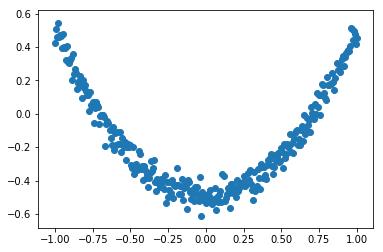

In [11]:
# plot the real data
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data,y_data)
plt.ion()
plt.show()

接下来，我们来显示预测数据。

每隔50次训练刷新一次图形，用红色、宽度为5的线来显示我们的预测数据和输入之间的关系，并暂停0.1s。

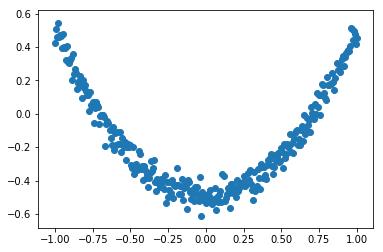

In [12]:
# plot the real data
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data,y_data)
plt.ion()# 连续plot
plt.show()
for i in range(1000):
    # training
    sess.run(train_step,feed_dict={xs:x_data,ys:y_data})
    # 每50步我们输出一下机器学习的误差。
    if i%50:
        # to see the step improvement
        try:
            ax.lines.remove(line[0])
        except Exception:
            pass
        prediction_value = sess.run(prediction,feed_dict={xs:x_data})
        # plot the prediction
        lines = ax.plot(x_data,prediction_value,'r-',lw=5)
        plt.pause(0.1)